<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Tejas/Deep_Learning_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Discussed with : Ramki Ramamurthy and Sushant Kotwal

References:</br>
1.https://www.tensorflow.org/tutorials/quickstart/beginner </br>
2.https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/</br>
3.https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/</br>
4.https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin</br>

In [5]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Found GPU at: /device:GPU:0


In [3]:

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


#Code to check connection and usage of GPU

In [4]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.0012950760000194
GPU (s):
0.04059034499999825
GPU speedup over CPU: 73x


# Build Network  
##Q1.1

In [6]:

# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [13]:
# Lets see the shapes of each Data sets
print("TRAIN SET:")
print("Training Set X_train shape is : {}".format(X_train.shape))
print("Training Set y_train shape is : {}".format(y_train.shape))
print("____"*25)
print("TEST SET:")
print("Test Set X_test shape is : {}".format(X_test.shape))
print("Test Set y_test shape is : {}".format(y_test.shape))

TRAIN SET:
Training Set X_train shape is : (60000, 28, 28)
Training Set y_train shape is : (60000,)
____________________________________________________________________________________________________
TEST SET:
Test Set X_test shape is : (10000, 28, 28)
Test Set y_test shape is : (10000,)


5


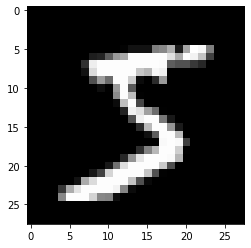

In [18]:
print(y_train[0])

# Lets its print an image
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

# So y_train has the label and X_train has its vectorial representation

##Library for Model Definition

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
# Build Sequential Model
model = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(1024, activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(1024,activation='relu'),
  layers.Dense(10)
])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 1024)              803840    
                                                                 
 dense_15 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_16 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_17 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_18 (Dense)            (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
No

Check:
param_number = output_channel_number * (input_channel_number + 1)

Dense layer 1 = 1024 * [784 + 1] = 803840 

Dense layer 2 = 1024*1025 = 1049600

Intuition is that its the connections ( Weights ) between the two layers that are to be trained.

In [ ]:
# Read that if we use softmax activation in the last layer then loss 
# calculation will not be right, so I used softmax on output of model

